In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('..')
import random, math
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\scala.jar'

In [9]:
import os
dirs = [r'..\circuits\PF', r'..\circuits\Arithmetic_and_Toffoli', r'..\circuits\QFT_and_Adders']
files = []
for d in dirs:
    for f in os.listdir(d):
        if not os.path.isfile(os.path.join(d,f)): continue
        if f.find('before') == -1: continue
        files.append(os.path.join(d,f))
files[:10]

['..\\circuits\\PF\\pf1_100_before',
 '..\\circuits\\PF\\pf1_10_before',
 '..\\circuits\\PF\\pf1_20_before',
 '..\\circuits\\PF\\pf1_30_before',
 '..\\circuits\\PF\\pf1_40_before',
 '..\\circuits\\PF\\pf1_50_before',
 '..\\circuits\\PF\\pf1_60_before',
 '..\\circuits\\PF\\pf1_70_before',
 '..\\circuits\\PF\\pf1_80_before',
 '..\\circuits\\PF\\pf1_90_before']

In [32]:
circuits = []
for f in files:
    try: c = zx.Circuit.from_quipper_file(f).to_basic_gates()
    except TypeError: continue
    #c.name = os.path.basename(f)
    circuits.append(c)

In [36]:
for c in circuits:
    print(c.name.ljust(30), str(c.qubits).ljust(3), len(c.gates))

adder_8_before                 24  1014
barenco_tof_10_before          19  514
barenco_tof_3_before           5   66
barenco_tof_4_before           7   130
barenco_tof_5_before           9   194
csla_mux_3_before_original     15  190
csum_mux_9_before_corrected    30  448
gf2^E10_mult_before            30  1709
gf2^E16_mult_before            48  4397
gf2^E4_mult_before             12  275
gf2^E5_mult_before             15  429
gf2^E6_mult_before             18  617
gf2^E7_mult_before             21  839
gf2^E8_mult_before             24  1109
gf2^E9_mult_before             27  1385
mod5_4_before                  5   71
mod_adder_1024_before          28  4855
mod_mult_55_before             9   133
mod_red_21_before              11  312
qcla_adder_10_before           36  589
qcla_com_7_before              24  501
qcla_mod_7_before              26  1002
rc_adder_6_before              14  222
tof_10_before                  19  289
tof_3_before                   5   51
tof_4_before         

In [37]:
print("Circuit".ljust(30), "qubits", "G-count", "T-count", "T-optimized")
for c in circuits:
    g = c.to_graph()
    t_before = zx.t_count(g)
    zx.simplify.full_reduce(g)
    t_after = zx.t_count(g)
    print(c.name.ljust(30), str(c.qubits).rjust(6), str(len(c.gates)).rjust(7), str(t_before).rjust(7), str(t_after).rjust(7))

Circuit                        qubits G-count T-count T-optimized
adder_8_before                     24    1014     399 179
barenco_tof_10_before              19     514     224 100
barenco_tof_3_before                5      66      28 16
barenco_tof_4_before                7     130      56 28
barenco_tof_5_before                9     194      84 40
csla_mux_3_before_original         15     190      70 62
csum_mux_9_before_corrected        30     448     196 84
gf2^E10_mult_before                30    1709     700 410
gf2^E16_mult_before                48    4397    1792 1040
gf2^E4_mult_before                 12     275     112 68
gf2^E5_mult_before                 15     429     175 115
gf2^E6_mult_before                 18     617     252 150
gf2^E7_mult_before                 21     839     343 217
gf2^E8_mult_before                 24    1109     448 264
gf2^E9_mult_before                 27    1385     567 351
mod5_4_before                       5      71      28 8
mod_adder_102

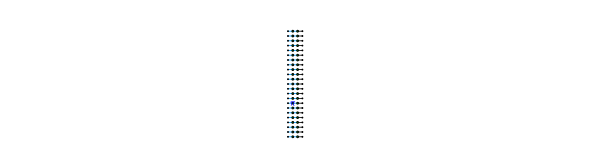

In [42]:
c = [c for c in circuits if c.name.find('Adder8')!=-1][0]
g = c.to_graph()
zx.full_reduce(g, quiet=True)
g.normalise()
zx.draw(g)